# MNIST


In [2]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import load_model
from keras import optimizers
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt

plt.style.use('ggplot')

Using TensorFlow backend.


### Load data / preprocessing

In [3]:
# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))
print("Classes: {}".format(np.unique(y_train)))

num_classes = len(np.unique(y_train))
print("Number of classes: {}".format(num_classes))


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
Classes: [0 1 2 3 4 5 6 7 8 9]
Number of classes: 10


**Objective** This is a classification task which takes as input gray scale images of hand-written numbers and predicts which of 10 numbers they show. The input images are 28 x 28 pixels (784 features) while the output variable gives the ground-truth label of the input images and takes values between 0 - 9. A classifier utilizing CNN will be trained on (X_train, y_train). (X_test, y_test) will be used as the validation set.

**Data preprocessing** To apply CNNs, X_train and X_test were reshaped into 4D-arrays of (m, 28, 28, 1), where m denotes the number of samples in each data set. All X_train and X_test inputs were normalized by 255 (the max intensity value) to minimize the effect of varying image intensity across images.

One-hot encoding was be applied to y_train and y_test. 

**Visualize a sample of the training images:**

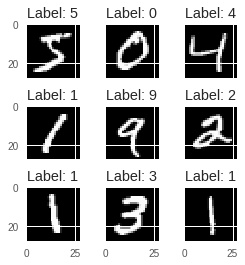

In [4]:
fig, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(4,4))
fig.subplots_adjust(hspace=0.5)
index = 0

# axes are in a two-dimensional array, indexed by [row, col]
for i in range(3):
    for j in range(3):
        ax[i, j].imshow(X_train[index], cmap=plt.get_cmap('gray'))
        ax[i, j].set_title("Label: {}".format(y_train[index]))
        index +=1

plt.show()

In [6]:
# reshape data
X_train_reshaped = X_train.reshape(X_train.shape[0], 28, 28,1).astype('float32')
X_test_reshaped = X_test.reshape(X_test.shape[0], 28, 28,1).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train_reshaped = X_train_reshaped / 255
X_test_reshaped = X_test_reshaped / 255

# one hot encode outputs
y_train_oh = np_utils.to_categorical(y_train)
y_test_oh = np_utils.to_categorical(y_test)

num_classes = y_train_oh.shape[1]

### Training Deep Learning Models

**LeNet Base Model**

A model based on the LeNet CNN architecture was trained using Adam optimizer. 

In [0]:
def create_lenet():

    seed = 7
    np.random.seed(seed)

    lenet_model = Sequential()
    lenet_model.add(Conv2D(6, kernel_size = (5, 5), strides = (1,1), input_shape=(28,28,1), padding = "same", activation='tanh'))
    lenet_model.add(AveragePooling2D(pool_size=(2, 2), strides = (2,2), padding = 'valid'))

    lenet_model.add(Conv2D(16, kernel_size = (5, 5), strides = (1,1), padding = "valid", activation='tanh'))
    lenet_model.add(AveragePooling2D(pool_size=(2, 2), strides = (2,2), padding = 'valid'))

    lenet_model.add(Conv2D(120, kernel_size = (5, 5), strides = (1,1), padding = "valid", activation='tanh'))

    lenet_model.add(Flatten())
    lenet_model.add(Dense(84, activation='tanh'))
    lenet_model.add(Dense(num_classes, activation='softmax'))

    return lenet_model


In [0]:
lenet_model= create_lenet()

# Compile model
lenet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
lenet_model_history = lenet_model.fit(X_train_reshaped, y_train_oh, validation_data=(X_test_reshaped, y_test_oh), epochs=30, 
                                      batch_size=128, verbose=2, shuffle=True)
          

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 5s - loss: 0.3287 - acc: 0.9049 - val_loss: 0.1417 - val_acc: 0.9579
Epoch 2/30
 - 4s - loss: 0.1190 - acc: 0.9640 - val_loss: 0.0854 - val_acc: 0.9741
Epoch 3/30
 - 4s - loss: 0.0791 - acc: 0.9753 - val_loss: 0.0749 - val_acc: 0.9775
Epoch 4/30
 - 4s - loss: 0.0583 - acc: 0.9821 - val_loss: 0.0597 - val_acc: 0.9803
Epoch 5/30
 - 4s - loss: 0.0456 - acc: 0.9858 - val_loss: 0.0549 - val_acc: 0.9846
Epoch 6/30
 - 4s - loss: 0.0373 - acc: 0.9884 - val_loss: 0.0507 - val_acc: 0.9832
Epoch 7/30
 - 4s - loss: 0.0317 - acc: 0.9902 - val_loss: 0.0493 - val_acc: 0.9846
Epoch 8/30
 - 4s - loss: 0.0260 - acc: 0.9918 - val_loss: 0.0424 - val_acc: 0.9872
Epoch 9/30
 - 4s - loss: 0.0222 - acc: 0.9930 - val_loss: 0.0452 - val_acc: 0.9855
Epoch 10/30
 - 4s - loss: 0.0183 - acc: 0.9941 - val_loss: 0.0453 - val_acc: 0.9862
Epoch 11/30
 - 4s - loss: 0.0159 - acc: 0.9949 - val_loss: 0.0451 - val_acc: 0.9866
Epoch 12/30
 - 4s - loss: 0.0136 - 

In [0]:
# evaluate model using accuracy and loss curves
def model_evaluate(history, model, X_test, y_test):

    # calculate prediction error on validation set
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("CNN Error: %.2f%%" % (100-scores[1]*100))


    f, (ax1,ax2) = plt.subplots(2,1,sharex=True, figsize = (8,8))
    f.subplots_adjust(hspace=0.3)

    #visualize accuracy over epochs
    ax1.plot(history.history['acc'], 'r', linewidth=1)
    ax1.plot(history.history['val_acc'], 'b', linewidth=1)
    ax1.legend(["Train Acc.", "Validation Acc."], loc = 0)
    ax1.set_title("Training/Validation Acc. per Epoch")
    ax1.set_ylabel("Accuracy")

    #annotate with training and validation accuracy at last epoch
    text = "Final Training Accuracy:{:.2f}%\nFinal Val. Accuracy:{:.2f}%".format(history.history['acc'][-1]*100,
                                                                            history.history['val_acc'][-1]*100)
    ax1.text(0.5, 0.5,text, transform=ax1.transAxes, fontsize=12)

    #visualize loss over epochs
    ax2.plot(history.history['loss'], 'r', linewidth=1)
    ax2.plot(history.history['val_loss'], 'b', linewidth=1)
    ax2.legend(["Train loss", "Validation loss"], loc = 0)
    ax2.set_title("Training/Validation loss per Epoch")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Loss")

    plt.show()
  

In [0]:
#save trained model and model history
def save_files(model, model_name, model_history):
    model.save(model_name+".h5")

    with open(model_name+".json", 'w') as f:
        json.dump(model_history.history, f)

CNN Error: 1.14%


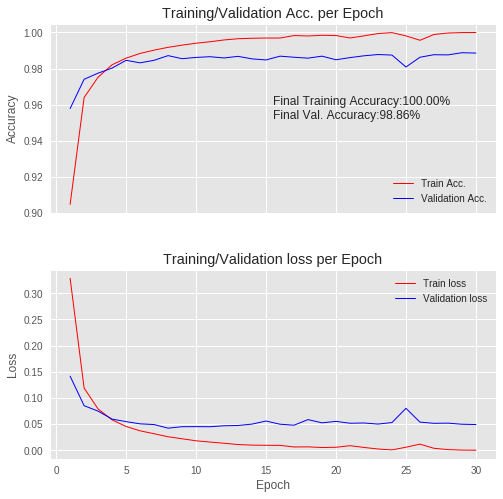

In [0]:
model_evaluate(lenet_model_history, lenet_model, X_test_reshaped, y_test_oh)
save_files(lenet_model, "lenet_model", lenet_model_history)

For the LeNet model, batch sizes of 128 and 256 were tried but it was found that the results were similar. The model shown used a batch size of 128.

Training loss plateaued after 20 epochs, so further training beyond 30 epochs was unlikely to improve model performance.

The validation accuracy was 98.9%, more than 1% lower than the training accuracy.  This suggests that the model may be slightly overfitting on the training set. 

To mitigate overfitting, three options were explored:

1) Add dropout layers to the model

2) Use data augmentation to increase the size of the training set

3) Explore different CNN architectures

**1) Add dropout layers to LeNet base model and use ReLu Activation**

In [0]:
def create_lenet_dropout():

    seed = 7
    np.random.seed(seed)

    lenet_model = Sequential()
    lenet_model.add(Conv2D(6, kernel_size = (5, 5), strides = (1,1), input_shape=(28,28,1), padding = "same", activation='relu'))
    lenet_model.add(AveragePooling2D(pool_size=(2, 2), strides = (2,2), padding = 'valid'))

    lenet_model.add(Conv2D(16, kernel_size = (5, 5), strides = (1,1), padding = "valid", activation='relu'))
    lenet_model.add(AveragePooling2D(pool_size=(2, 2), strides = (2,2), padding = 'valid'))
    lenet_model.add(Dropout(0.2))

    lenet_model.add(Conv2D(120, kernel_size = (5, 5), strides = (1,1), padding = "valid", activation='relu'))

    lenet_model.add(Flatten())
    lenet_model.add(Dropout(0.2))
    lenet_model.add(Dense(84, activation='relu'))
    lenet_model.add(Dense(num_classes, activation='softmax'))

    return lenet_model

#create model instance
lenet_dropout_model= create_lenet_dropout()

# Compile model
lenet_dropout_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
lenet_dropout_model_history = lenet_dropout_model.fit(X_train_reshaped, y_train_oh, validation_data=(X_test_reshaped, y_test_oh), epochs=30, batch_size=128, verbose=2, shuffle=True)     


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 5s - loss: 0.3980 - acc: 0.8783 - val_loss: 0.1059 - val_acc: 0.9669
Epoch 2/30
 - 5s - loss: 0.1255 - acc: 0.9616 - val_loss: 0.0650 - val_acc: 0.9788
Epoch 3/30
 - 4s - loss: 0.0952 - acc: 0.9710 - val_loss: 0.0528 - val_acc: 0.9819
Epoch 4/30
 - 4s - loss: 0.0788 - acc: 0.9759 - val_loss: 0.0429 - val_acc: 0.9863
Epoch 5/30
 - 4s - loss: 0.0697 - acc: 0.9781 - val_loss: 0.0376 - val_acc: 0.9879
Epoch 6/30
 - 4s - loss: 0.0631 - acc: 0.9805 - val_loss: 0.0394 - val_acc: 0.9872
Epoch 7/30
 - 4s - loss: 0.0578 - acc: 0.9826 - val_loss: 0.0343 - val_acc: 0.9882
Epoch 8/30
 - 4s - loss: 0.0510 - acc: 0.9843 - val_loss: 0.0299 - val_acc: 0.9906
Epoch 9/30
 - 4s - loss: 0.0471 - acc: 0.9852 - val_loss: 0.0289 - val_acc: 0.9901
Epoch 10/30
 - 4s - loss: 0.0425 - acc: 0.9864 - val_loss: 0.0329 - val_acc: 0.9888
Epoch 11/30
 - 4s - loss: 0.0424 - acc: 0.9869 - val_loss: 0.0325 - val_acc: 0.9893
Epoch 12/30
 - 4s - loss: 0.0398 - 

CNN Error: 0.74%


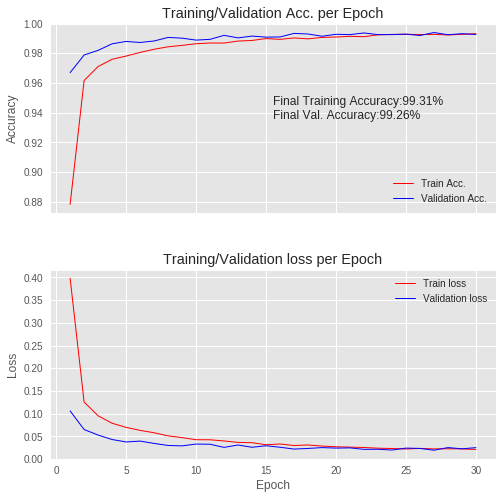

In [0]:
model_evaluate(lenet_dropout_model_history, lenet_dropout_model, X_test_reshaped, y_test_oh)
save_files(lenet_dropout_model, "lenet_dropout_model", lenet_dropout_model_history)

Different dropout values were tested to optimize the model. A dropout value of 0.2 gave the best validation accuracy of 99.3%, a 0.4% improvement over the base LeNet model, which suggests that this model generalizes better. 

**2) LeNet base model with data augmentation**

To reduce overfitting, data augmentation was used to create a larger pool of training samples to train the base LeNet model.

In [0]:
# Create another instance of base lenet model
lenet_model_dataAug= create_lenet()

# Compile model
lenet_model_dataAug.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [0]:
# create image generator for augmented data from X_train
gen = ImageDataGenerator(rotation_range=5, width_shift_range=0.05, shear_range=0.2,
                         height_shift_range=0.05, zoom_range=0.05)

train_generator = gen.flow(X_train_reshaped, y_train_oh, batch_size=128)

lenet_model_dataAug_history = lenet_model_dataAug.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=30, validation_data=(X_test_reshaped, y_test_oh), verbose=2)

Epoch 1/30
 - 18s - loss: 0.4544 - acc: 0.8657 - val_loss: 0.1339 - val_acc: 0.9602
Epoch 2/30
 - 17s - loss: 0.1527 - acc: 0.9534 - val_loss: 0.0839 - val_acc: 0.9724
Epoch 3/30
 - 17s - loss: 0.1008 - acc: 0.9687 - val_loss: 0.0647 - val_acc: 0.9781
Epoch 4/30
 - 18s - loss: 0.0803 - acc: 0.9752 - val_loss: 0.0507 - val_acc: 0.9838
Epoch 5/30
 - 18s - loss: 0.0681 - acc: 0.9787 - val_loss: 0.0431 - val_acc: 0.9853
Epoch 6/30
 - 17s - loss: 0.0589 - acc: 0.9815 - val_loss: 0.0396 - val_acc: 0.9872
Epoch 7/30
 - 18s - loss: 0.0530 - acc: 0.9832 - val_loss: 0.0402 - val_acc: 0.9874
Epoch 8/30
 - 17s - loss: 0.0492 - acc: 0.9849 - val_loss: 0.0450 - val_acc: 0.9866
Epoch 9/30
 - 18s - loss: 0.0479 - acc: 0.9854 - val_loss: 0.0345 - val_acc: 0.9887
Epoch 10/30
 - 18s - loss: 0.0428 - acc: 0.9865 - val_loss: 0.0386 - val_acc: 0.9866
Epoch 11/30
 - 18s - loss: 0.0421 - acc: 0.9870 - val_loss: 0.0329 - val_acc: 0.9899
Epoch 12/30
 - 18s - loss: 0.0387 - acc: 0.9875 - val_loss: 0.0343 - val_a

CNN Error: 0.94%


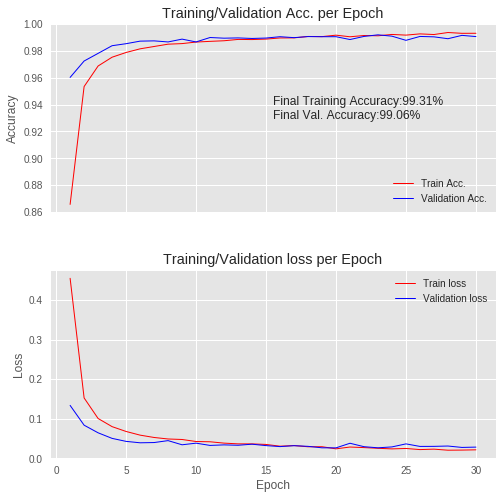

In [0]:
model_evaluate(lenet_model_dataAug_history, lenet_model_dataAug, X_test_reshaped, y_test_oh)
save_files(lenet_model_dataAug, "lenet_model_dataAug", lenet_model_dataAug_history)

With data augmentation (i.e. a larger training set), the LeNet base model generalized better to the validation data,  with an improvement in validation accuracy to 99.1%, compared to 98.9% on just the original data set. However, it does not perform as well as the model with dropout.

**3) Experiments with other CNN Architectures:**

To see if prediction accuracy could be further improved, experiments were conducted using different model architectures based loosely on AlexNet and VGGNet.

**a) CNN with 4 Conv Layers + 3 FCs** 

AlexNet has 5 Convolution(Conv) layers + 3 Fully Connected(FC) layers and takes in images of 227x227 pixels to give 1000 possible output classes. 

The inputs to the 2nd Conv layer in AlexNet are 27 x 27 pixels, similar in size to the MNIST data (28 x 28) and the MNIST data set is less complex (only 10 classes). A model architecture was therefore adapted loosely from AlexNet with the first Conv layer removed, leaving 4 Conv + 3 FC layers.

Considering the relative simplicity of the MNIST data, the number of filters was reduced to keep the number of parameters as low as possible without compromising prediction accuracy.  

In [0]:
def create_model_4Conv_3FC():
    seed = 7
    np.random.seed(seed)

    model = Sequential()
    model.add(Conv2D(12, kernel_size = (5, 5), strides = (1,1), input_shape=(28,28,1), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides = (2,2)))
    model.add(BatchNormalization())

    model.add(Conv2D(48, kernel_size = (3, 3), strides = (1,1), padding = "same", activation='relu'))
    model.add(Conv2D(48, kernel_size = (3, 3), strides = (1,1), padding = "same", activation='relu'))
    model.add(Conv2D(32, kernel_size = (3, 3), strides = (1,1), padding = "same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides = (2,2)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))

    model.add(Dropout(0.4))
    model.add(Dense(512, activation='relu'))

    model.add(Dense(num_classes, activation='softmax'))

    return model


In [12]:
model_4Conv_3FC = create_model_4Conv_3FC()

# set lower learning rate for optimizer
adam = optimizers.Adam(lr=1e-4)

# compile model
model_4Conv_3FC.compile(loss='categorical_crossentropy', optimizer= adam, metrics=['accuracy'])

# Fit the model
model_4Conv_3FC_history = model_4Conv_3FC.fit(X_train_reshaped, y_train_oh, validation_data=(X_test_reshaped, y_test_oh), epochs=30, batch_size=128, verbose=2, shuffle=True)          


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 8s - loss: 0.5207 - acc: 0.8305 - val_loss: 0.0859 - val_acc: 0.9719
Epoch 2/30
 - 7s - loss: 0.1253 - acc: 0.9610 - val_loss: 0.0478 - val_acc: 0.9847
Epoch 3/30
 - 7s - loss: 0.0898 - acc: 0.9720 - val_loss: 0.0373 - val_acc: 0.9874
Epoch 4/30
 - 7s - loss: 0.0732 - acc: 0.9774 - val_loss: 0.0294 - val_acc: 0.9903
Epoch 5/30
 - 7s - loss: 0.0609 - acc: 0.9805 - val_loss: 0.0241 - val_acc: 0.9918
Epoch 6/30
 - 7s - loss: 0.0518 - acc: 0.9837 - val_loss: 0.0216 - val_acc: 0.9924
Epoch 7/30
 - 7s - loss: 0.0462 - acc: 0.9852 - val_loss: 0.0220 - val_acc: 0.9926
Epoch 8/30
 - 7s - loss: 0.0426 - acc: 0.9864 - val_loss: 0.0197 - val_acc: 0.9931
Epoch 9/30
 - 7s - loss: 0.0379 - acc: 0.9886 - val_loss: 0.0222 - val_acc: 0.9915
Epoch 10/30
 - 7s - loss: 0.0351 - acc: 0.9888 - val_loss: 0.0200 - val_acc: 0.9931
Epoch 11/30
 - 7s - loss: 0.0332 - acc: 0.9895 - val_loss: 0.0161 - val_acc: 0.9946
Epoch 12/30
 - 7s - loss: 0.0289 - 

CNN Error: 0.46%


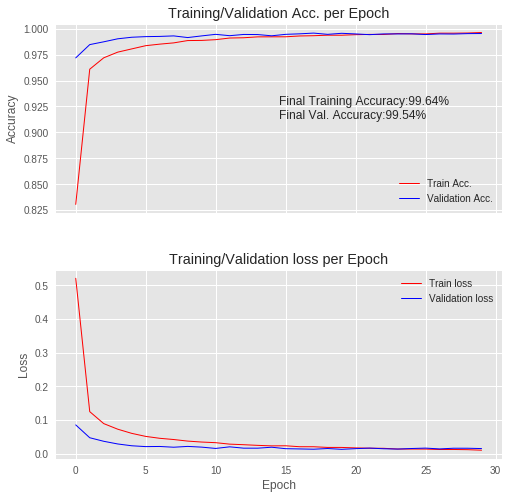

In [13]:
save_files(model_4Conv_3FC, "model_4Conv_3FC", model_4Conv_3FC_history)
model_evaluate(model_4Conv_3FC_history, model_4Conv_3FC, X_test_reshaped, y_test_oh)

The model with 4 Conv + 3 FC layers gives an appreciable improvement in validation accuracy to 99.54%.

The loss and accuracy curves show slightly better performance on the validation set up to Epoch 20, which is atypical of machine learning problems. This could be attributed to the use of dropout i.e. weights were turned off when evaluating training batches, leading to less robust performance in the earlier training batches. This effect was less pronounced in later epochs as weights would have approached their optimal values.

In training this model, the following parameters were tuned:

1) ***Learning rate:*** Initially, the default learning rate of 1e-3 was used, which gave loss curves that continued to fluctuate at epochs 20-30. This suggested that the learning rate was too large and the weights were oscillating around the minimum loss. The learning rate was lowered to 1e-4, which increased the stability of the loss curves (shown above). The plateau from Epoch 20 onwards suggests that the model has converged to its loss minimum. (Note: please refer to the image "model_4Conv_3FC_defaultlr.png" for loss curves generated with learning rate = 1e-3)

2) ***Dropout values:*** Initial dropout values of 0.5 were used but the model appeared to overfit to the validation data, with final validation accuracy being higher than training accuracy. Different dropout values were tried, with a value of 0.4 giving the best validation accuracy without overfitting on validation data.

3) ***Number of filters:*** The number of filters was varied to determine the lowest number of filters required to preserve training and validation accuracy. It was found that training accuracy started to suffer significantly when the number of filters was decreased below the values used in this notebook.

**b) CNN with 6 Conv Layers + 3 FCs** 

VGGnet utilizes only 3x3 filters and 2x2 pooling layers. A scaled down version of VGGnet was adopted, i.e. using the last 6 Conv and 3 FC layers. 

In [0]:
def create_model_6Conv_3FC():
    seed = 7
    np.random.seed(seed)

    model = Sequential()
    model.add(Conv2D(24, kernel_size = (3, 3), strides = (1,1), input_shape=(28,28,1), activation='relu', padding='same'))
    model.add(Conv2D(24, kernel_size = (3, 3), strides = (1,1), activation='relu', padding='same'))
    model.add(Conv2D(24, kernel_size = (3, 3), strides = (1,1), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
    model.add(BatchNormalization())

    model.add(Conv2D(24, kernel_size = (3, 3), strides = (1,1), activation='relu', padding='same'))
    model.add(Conv2D(24, kernel_size = (3, 3), strides = (1,1), activation='relu', padding='same'))
    model.add(Conv2D(24, kernel_size = (3, 3), strides = (1,1), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model


In [0]:
model_6Conv_3FC = create_model_6Conv_3FC()

adam = optimizers.Adam(lr=1e-4)

#compile model
model_6Conv_3FC.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# Fit the model
model_6Conv_3FC_history = model_6Conv_3FC.fit(X_train_reshaped, y_train_oh, validation_data=(X_test_reshaped, y_test_oh),
                                                  epochs=30, batch_size=128, verbose=2, shuffle=True)
          

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 13s - loss: 0.2192 - acc: 0.9369 - val_loss: 0.0634 - val_acc: 0.9794
Epoch 2/30
 - 11s - loss: 0.0505 - acc: 0.9847 - val_loss: 0.0361 - val_acc: 0.9887
Epoch 3/30
 - 11s - loss: 0.0307 - acc: 0.9909 - val_loss: 0.0429 - val_acc: 0.9862
Epoch 4/30
 - 11s - loss: 0.0207 - acc: 0.9939 - val_loss: 0.0335 - val_acc: 0.9887
Epoch 5/30
 - 11s - loss: 0.0128 - acc: 0.9962 - val_loss: 0.0325 - val_acc: 0.9894
Epoch 6/30
 - 11s - loss: 0.0091 - acc: 0.9978 - val_loss: 0.0286 - val_acc: 0.9898
Epoch 7/30
 - 11s - loss: 0.0053 - acc: 0.9989 - val_loss: 0.0262 - val_acc: 0.9902
Epoch 8/30
 - 11s - loss: 0.0040 - acc: 0.9991 - val_loss: 0.0245 - val_acc: 0.9919
Epoch 9/30
 - 11s - loss: 0.0038 - acc: 0.9991 - val_loss: 0.0576 - val_acc: 0.9830
Epoch 10/30
 - 11s - loss: 0.0033 - acc: 0.9992 - val_loss: 0.0331 - val_acc: 0.9902
Epoch 11/30
 - 11s - loss: 0.0039 - acc: 0.9990 - val_loss: 0.0292 - val_acc: 0.9912
Epoch 12/30
 - 11s - los

CNN Error: 0.72%


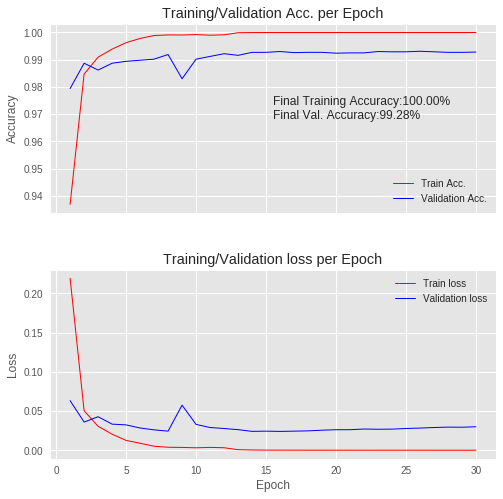

In [0]:
model_evaluate(model_6Conv_3FC_history, model_6Conv_3FC, X_test_reshaped, y_test_oh)
save_files(model_6Conv_3FC, "model_6Conv_3FC", model_6Conv_3FC_history)

The model with 6 Conv + 3 FC layers has a validation accuracy of 99.28%, an improvement over the base LeNet model. The following parameters were tuned:

1) ***Learning rate:*** The learning rate was decreased to 1e-4 which yielded stabler loss curves. This facilitated confirmation that the training had converged to the loss minimum. (Note: please refer to the image "model_6Convs_3FC_defaultlr.png" for the noisy loss curves generated with learning rate = 1e-3)

2) ***Dropout values:*** Experiments were conducted with different dropout values, but they did not have an impact on improving validation accuracy. Hence, dropout was not used in the final model.

3) ***Number of filters:*** The number of filters was varied to determine the lowest number of filters required to preserve training and validation accuracy. 

### Comparison of model performance

In [30]:
#create table of performance measures
index = ["lenet_model","lenet_dropout_model","lenet_model_dataAug",
          "model_4Conv_3FC", "model_6Conv_3FC"]
model_history = [lenet_model_history.history,lenet_dropout_model_history.history,
                 lenet_model_dataAug_history.history,
                 model_4Conv_3FC_history.history, 
                 model_6Conv_3FC_history.history]
models = [lenet_model,lenet_dropout_model,lenet_model_dataAug,
          model_4Conv_3FC, model_6Conv_3FC]

trainingAcc = []
valAcc = []
trainingLoss = []
valLoss = []
numParams = []

for model, hist in zip(models, model_history):
    trainingAcc.append(round(hist['acc'][-1],4))
    valAcc.append(round(hist['val_acc'][-1],4))
    trainingLoss.append(round(hist['loss'][-1],4))
    valLoss.append(round(hist['val_loss'][-1],4))
    numParams.append(model.count_params())

df = pd.DataFrame(list(zip(trainingAcc, valAcc, trainingLoss, valLoss, numParams)), 
               columns =['trainingAcc', 'valAcc', 'trainingLoss', 'valLoss', 'numParams'], 
                 index = index) 
  

In [31]:
df

,trainingAcc,valAcc,trainingLoss,valLoss,numParams
lenet_model,1.0000,0.9886,0.0003,0.0493,61706
lenet_dropout_model,0.9931,0.9926,0.0211,0.0251,61706
lenet_model_dataAug,0.9931,0.9906,0.0218,0.0286,61706
model_4Conv_3FC,0.9964,0.9954,0.0109,0.0157,898354
model_6Conv_3FC,1.0000,0.9928,0.0003,0.0302,896882


Model performance was compared based on validation accuracy and loss, with number of parameters as a secondary consideration. For two models with similar prediction accuracy, the model with a significantly lower number of parameters would be preferred as it would be less computationally expensive to train and make predictions.

The ***model_4Conv_3FC*** had the best predictive performance with a validation accuracy of 99.54% and the lowest validation loss, but it also had the largest number of parameters.

The ***lenet_dropout_model*** performed relatively well with a much lower number of parameters, and had the next lowest validation loss.

These 2 models were further evaluated to understand the types of images they misclassfied.

### Further Model Evaluation

In [32]:
#plot a sampling of misclassified test images
def view_mislabelled(model, X_test, y_test):

    plt.rcParams['axes.titlesize'] = 8
    predictions = model.predict(X_test, batch_size=32, verbose=1)
    predictions_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test, axis=1)

    mislabelled_indices = np.where((predictions_classes != true_classes)==True)[0]

    fig, ax = plt.subplots(4, 4, sharex='col', sharey='row', figsize=(6,6))
    fig.subplots_adjust(hspace=0.8)
    index = 0

    for i in range(4):
        for j in range(4):
            ax[i, j].imshow(X_test[mislabelled_indices[index]].reshape(28,28), cmap=plt.get_cmap('gray'))
            ax[i, j].set_title("Predicted:{}\nActual:{}".format(predictions_classes[mislabelled_indices[index]],true_classes[mislabelled_indices[index]]))
            index +=1

    plt.show()

#plot confusion matrix heatmap
def view_confusion_matrix(model,X_test,y_test):

    predictions = model.predict(X_test, batch_size=32, verbose=1)
    predictions_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test, axis=1)

    cm = confusion_matrix(true_classes, predictions_classes)

    # Visualize confusion matrix
    df_cm = pd.DataFrame(cm, range(10), range(10))
    fig, ax = plt.subplots(figsize = (8,6))
    sns.set(font_scale=1.2) 
    ax = sns.heatmap(df_cm, annot=True, annot_kws={"size": 10}, cmap="Blues") # font size
    ax.set(xlabel='Predicted', ylabel='Actual')
    plt.show()

**Lenet Dropout Model** 

10000/10000 [==============================] - 2s 151us/step


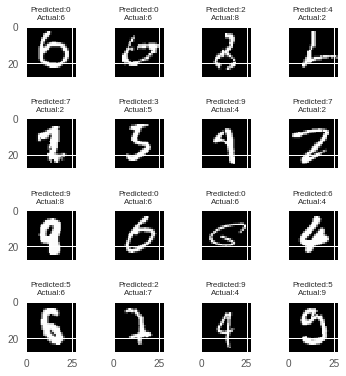

In [0]:
view_mislabelled(lenet_dropout_model, X_test_reshaped, y_test_oh)

10000/10000 [==============================] - 1s 79us/step


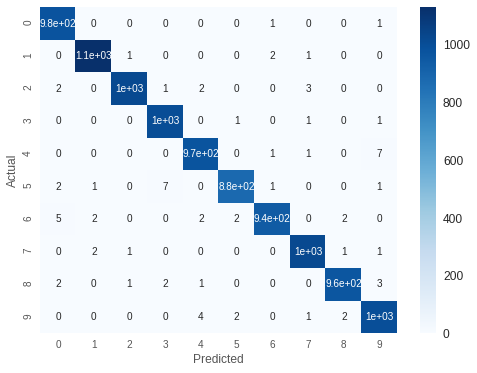

In [0]:
view_confusion_matrix(lenet_dropout_model, X_test_reshaped, y_test_oh)

**4Convs + 3FCs model**

10000/10000 [==============================] - 1s 108us/step


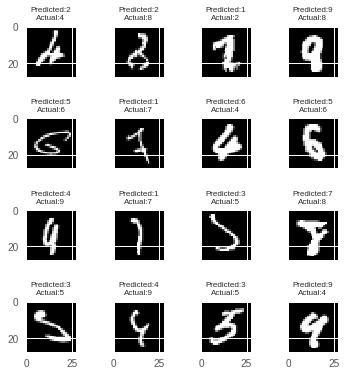

In [15]:
view_mislabelled(model_4Conv_3FC, X_test_reshaped, y_test_oh)

10000/10000 [==============================] - 1s 93us/step


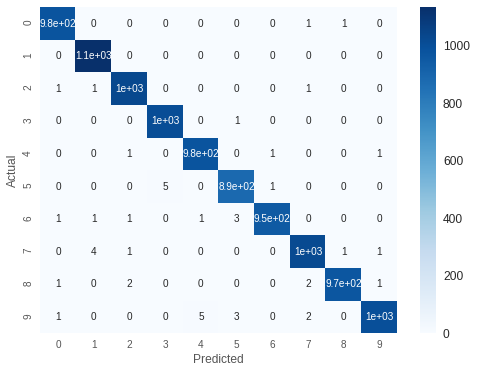

In [16]:
view_confusion_matrix(model_4Conv_3FC, X_test_reshaped, y_test_oh)

**Lenet Dropout Model** The model tends to mislabel '6' as '0', '5' as '3' and '4' as '9'.

**4Convs + 3FCs Model** The model tends to mislabel '7' as '1', '5' as '3' and '9' as '4'.

Generally, misclassification tends to occur for digits that inherently look similar to other digits, e.g. '6' and '0' could look very similar. The low image resolution also led to some of the handwritten strokes not being clearly defined, which might have played a role in the misclassification.

The sample of mislabelled images above show obvious misclassification errors, but a fair number appear ambiguous even to the human eye. For instance, I mislabelled 25% of the 16 images shown for the the 4Convs+3FC model. 


### Summary

5 CNN models were trained on MNIST data, to classify the images as 1 of 10 possible numbers. 

To optimize each model, hyperparameters such as number of filters, dropout value, learning rate and batch size were varied. Accuracy and loss curves plotted vs epoch were used to judge if model training had converged to a loss minimum for each model. 

Model performance was compared based on accuracy and loss on the validation set. 

CNN models utilizing dropout appeared to perform better as they helped to minimize overfitting on the training set and generalized better to unseen data.

The 2 best models were identified to be the 'lenet_dropout_model' and 'model_4Conv_3FC'. These 2 models were further evaluated to investigate the errors made. Misclassifications tended to occur for digits that inherently look similar to other digits. 

Given the already high prediction accuracy of the models and the ambiguity of some of these images, further improvements in prediction accuracy would be challenging, but could potentially be attained by training with a larger data set, using higher resolution images or using different model architectures. 



### References

1) ***Image classification with CNNs and small augmented datasets*** https://www.novatec-gmbh.de/en/blog/keras-data-augmentation-for-cnn/

2) ***How to use Keras fit and fit_generator (a hands-on tutorial)*** [https://www.pyimagesearch.com/2018/12/24/how-to-use-keras-fit-and-fit_generator-a-hands-on-tutorial/]

3) ***A Walk-through of AlexNet*** https://medium.com/@smallfishbigsea/a-walk-through-of-alexnet-6cbd137a5637

4) ***ImageNet: VGGNet, ResNet, Inception, and Xception with Keras*** https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/

4) https://stackoverflow.com/questions/43979449/higher-validation-accuracy-than-training-accurracy-using-tensorflow-and-keras

5) https://stackoverflow.com/questions/42878683/keras-cifar10-example-validation-and-test-loss-lower-than-training-loss/42924616#42924616

6) https://datascience.stackexchange.com/questions/24511/why-should-the-data-be-shuffled-for-machine-learning-tasks

7) ***LeNet-5 – A Classic CNN Architecture*** https://engmrk.com/lenet-5-a-classic-cnn-architecture/

8) ***Learning Rate Tuning in Deep Learning: A Practical Guide*** http://mlexplained.com/2018/01/29/learning-rate-tuning-in-deep-learning-a-practical-guide/